In [1]:
%pip install requests networkx

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import network

In [18]:
import requests
url = "https://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"

httpReq = requests.get(url)
ans = httpReq.text
#print(ans)


In [26]:
import re

def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]
                
            
def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

def isMitab_Human_EBV(mitabLine):
    reHuman   = "taxid:9606"
    if re.search(reHuman, mitabLine[9]) or re.search(reHuman, mitabLine[10]):
        return True
    return False


EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0
for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}, Human-EBV {len(EBV_Human_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59, Human-EBV 171


48


In [39]:
EBV_protein = set()
for mitab in EBV_EBV_mitab:
    EBV_protein.add(mitab[0])
    EBV_protein.add(mitab[1])

Human_protein = set()
for mitab in EBV_Human_mitab:
    if 'taxid:9606' in mitab[9] : 
        Human_protein.add(mitab[0])
        EBV_protein.add(mitab[1])
    else :
        Human_protein.add(mitab[1])
        EBV_protein.add(mitab[0])
print(len(EBV_protein))
print(len(Human_protein))

64
113


In [37]:
print(EBV_Human_mitab[0])

['Q3KSN9', 'Q15723', 'intact:EBI-2621948', 'intact:EBI-956941|uniprotkb:E9PCX3|uniprotkb:Q15724|uniprotkb:Q15725|uniprotkb:Q6P1K5|ensembl:ENSP00000368868.1|ensembl:ENSP00000510098.1', 'psi-mi:dnbi_ebvg(display_long)|uniprotkb:DBP(gene name)|psi-mi:DBP(display_short)|uniprotkb:BALF2(orf name)', 'psi-mi:elf2_human(display_long)|uniprotkb:ELF2(gene name)|psi-mi:ELF2(display_short)|uniprotkb:NERF(gene name synonym)|uniprotkb:E74-like factor 2(gene name synonym)|uniprotkb:New ETS-related factor(gene name synonym)', 'psi-mi:"MI:0018"(two hybrid)', 'Calderwood et al. (2007)', 'pubmed:17446270|imex:IM-20435|mint:MINT-6769080', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'taxid:9606(human)|taxid:9606(Homo sapiens)', 'psi-mi:"MI:0915"(physical association)', 'psi-mi:"MI:0469"(IntAct)', 'intact:EBI-2621952|imex:IM-20435-58', 'intact-miscore:0.37']


In [70]:
import networkx as nx
import matplotlib.pyplot as plt

In [49]:
G = nx.Graph()
G.add_edge("a","b",weight=12,scope='book')
G.add_edge("d","c")

In [47]:
G["b"]["a"]
G.edges()

EdgeView([('a', 'b'), ('d', 'c')])

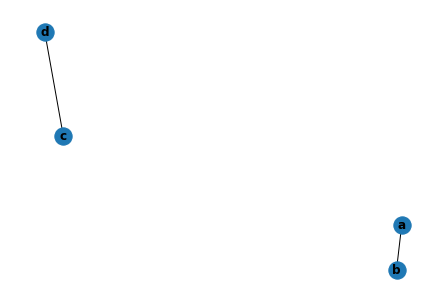

In [71]:

nx.draw(G, with_labels=True, font_weight='bold')

In [51]:
EBV_G = nx.Graph()
for mitab in EBV_EBV_mitab:
    EBV_G.add_edge(mitab[0],mitab[1])

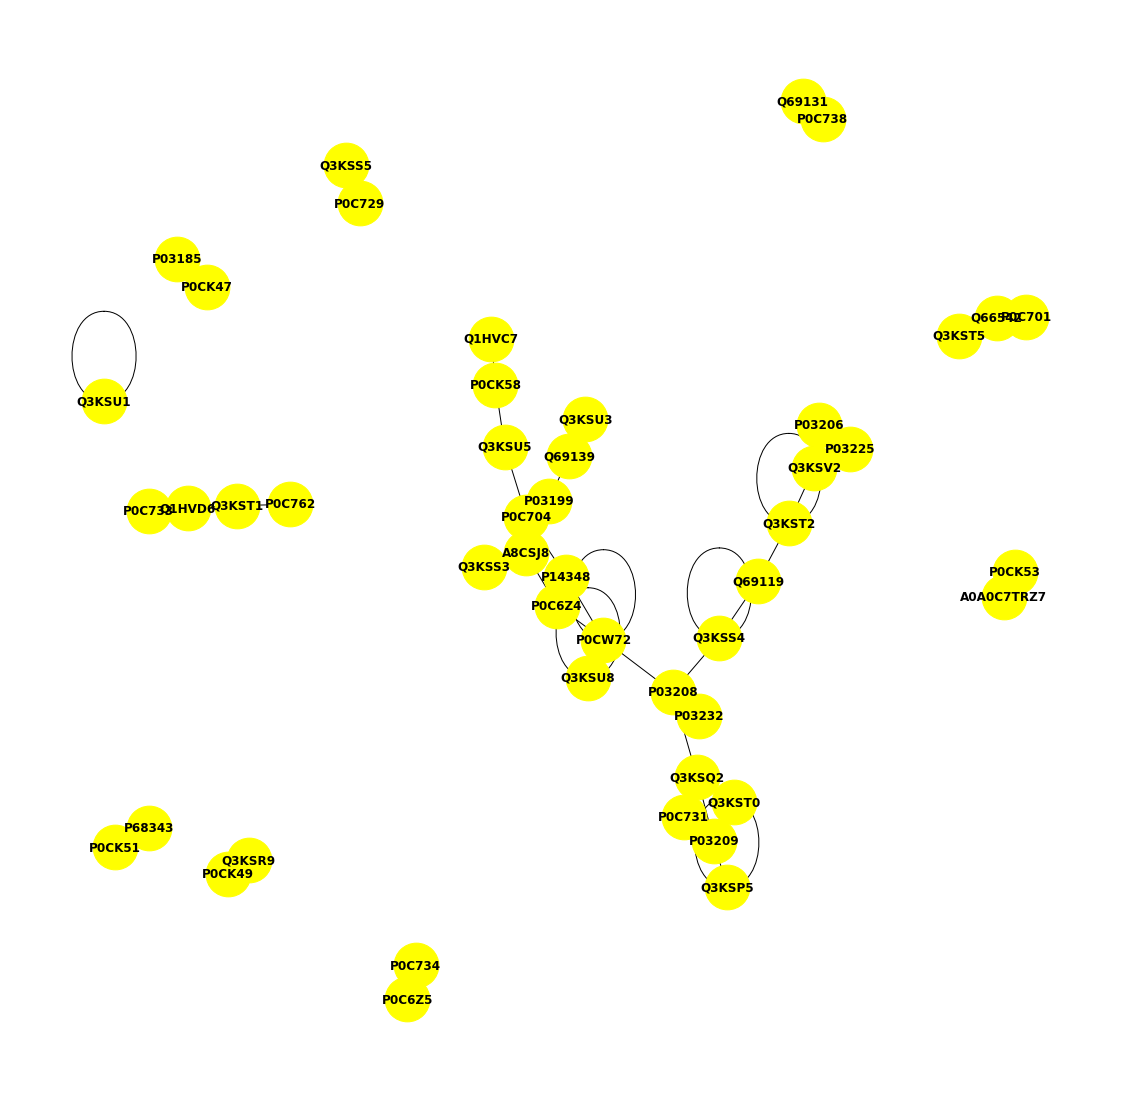

In [78]:
fig,host_ax = plt.subplots(figsize = (20,20))
host_ax.set_axis_off()
nx.draw(EBV_G, ax = host_ax,with_labels=True, node_size = 2000,
        node_color = 'yellow',font_weight='bold')

In [92]:
Human_EBV_G = nx.Graph()
color_list = []
for mitab in EBV_Human_mitab:
    Human_EBV_G.add_edge(mitab[0],mitab[1])
for node in list(Human_EBV_G.nodes):
    if node in Human_protein:
        color_list.append("green")
    else : 
        color_list.append("yellow")

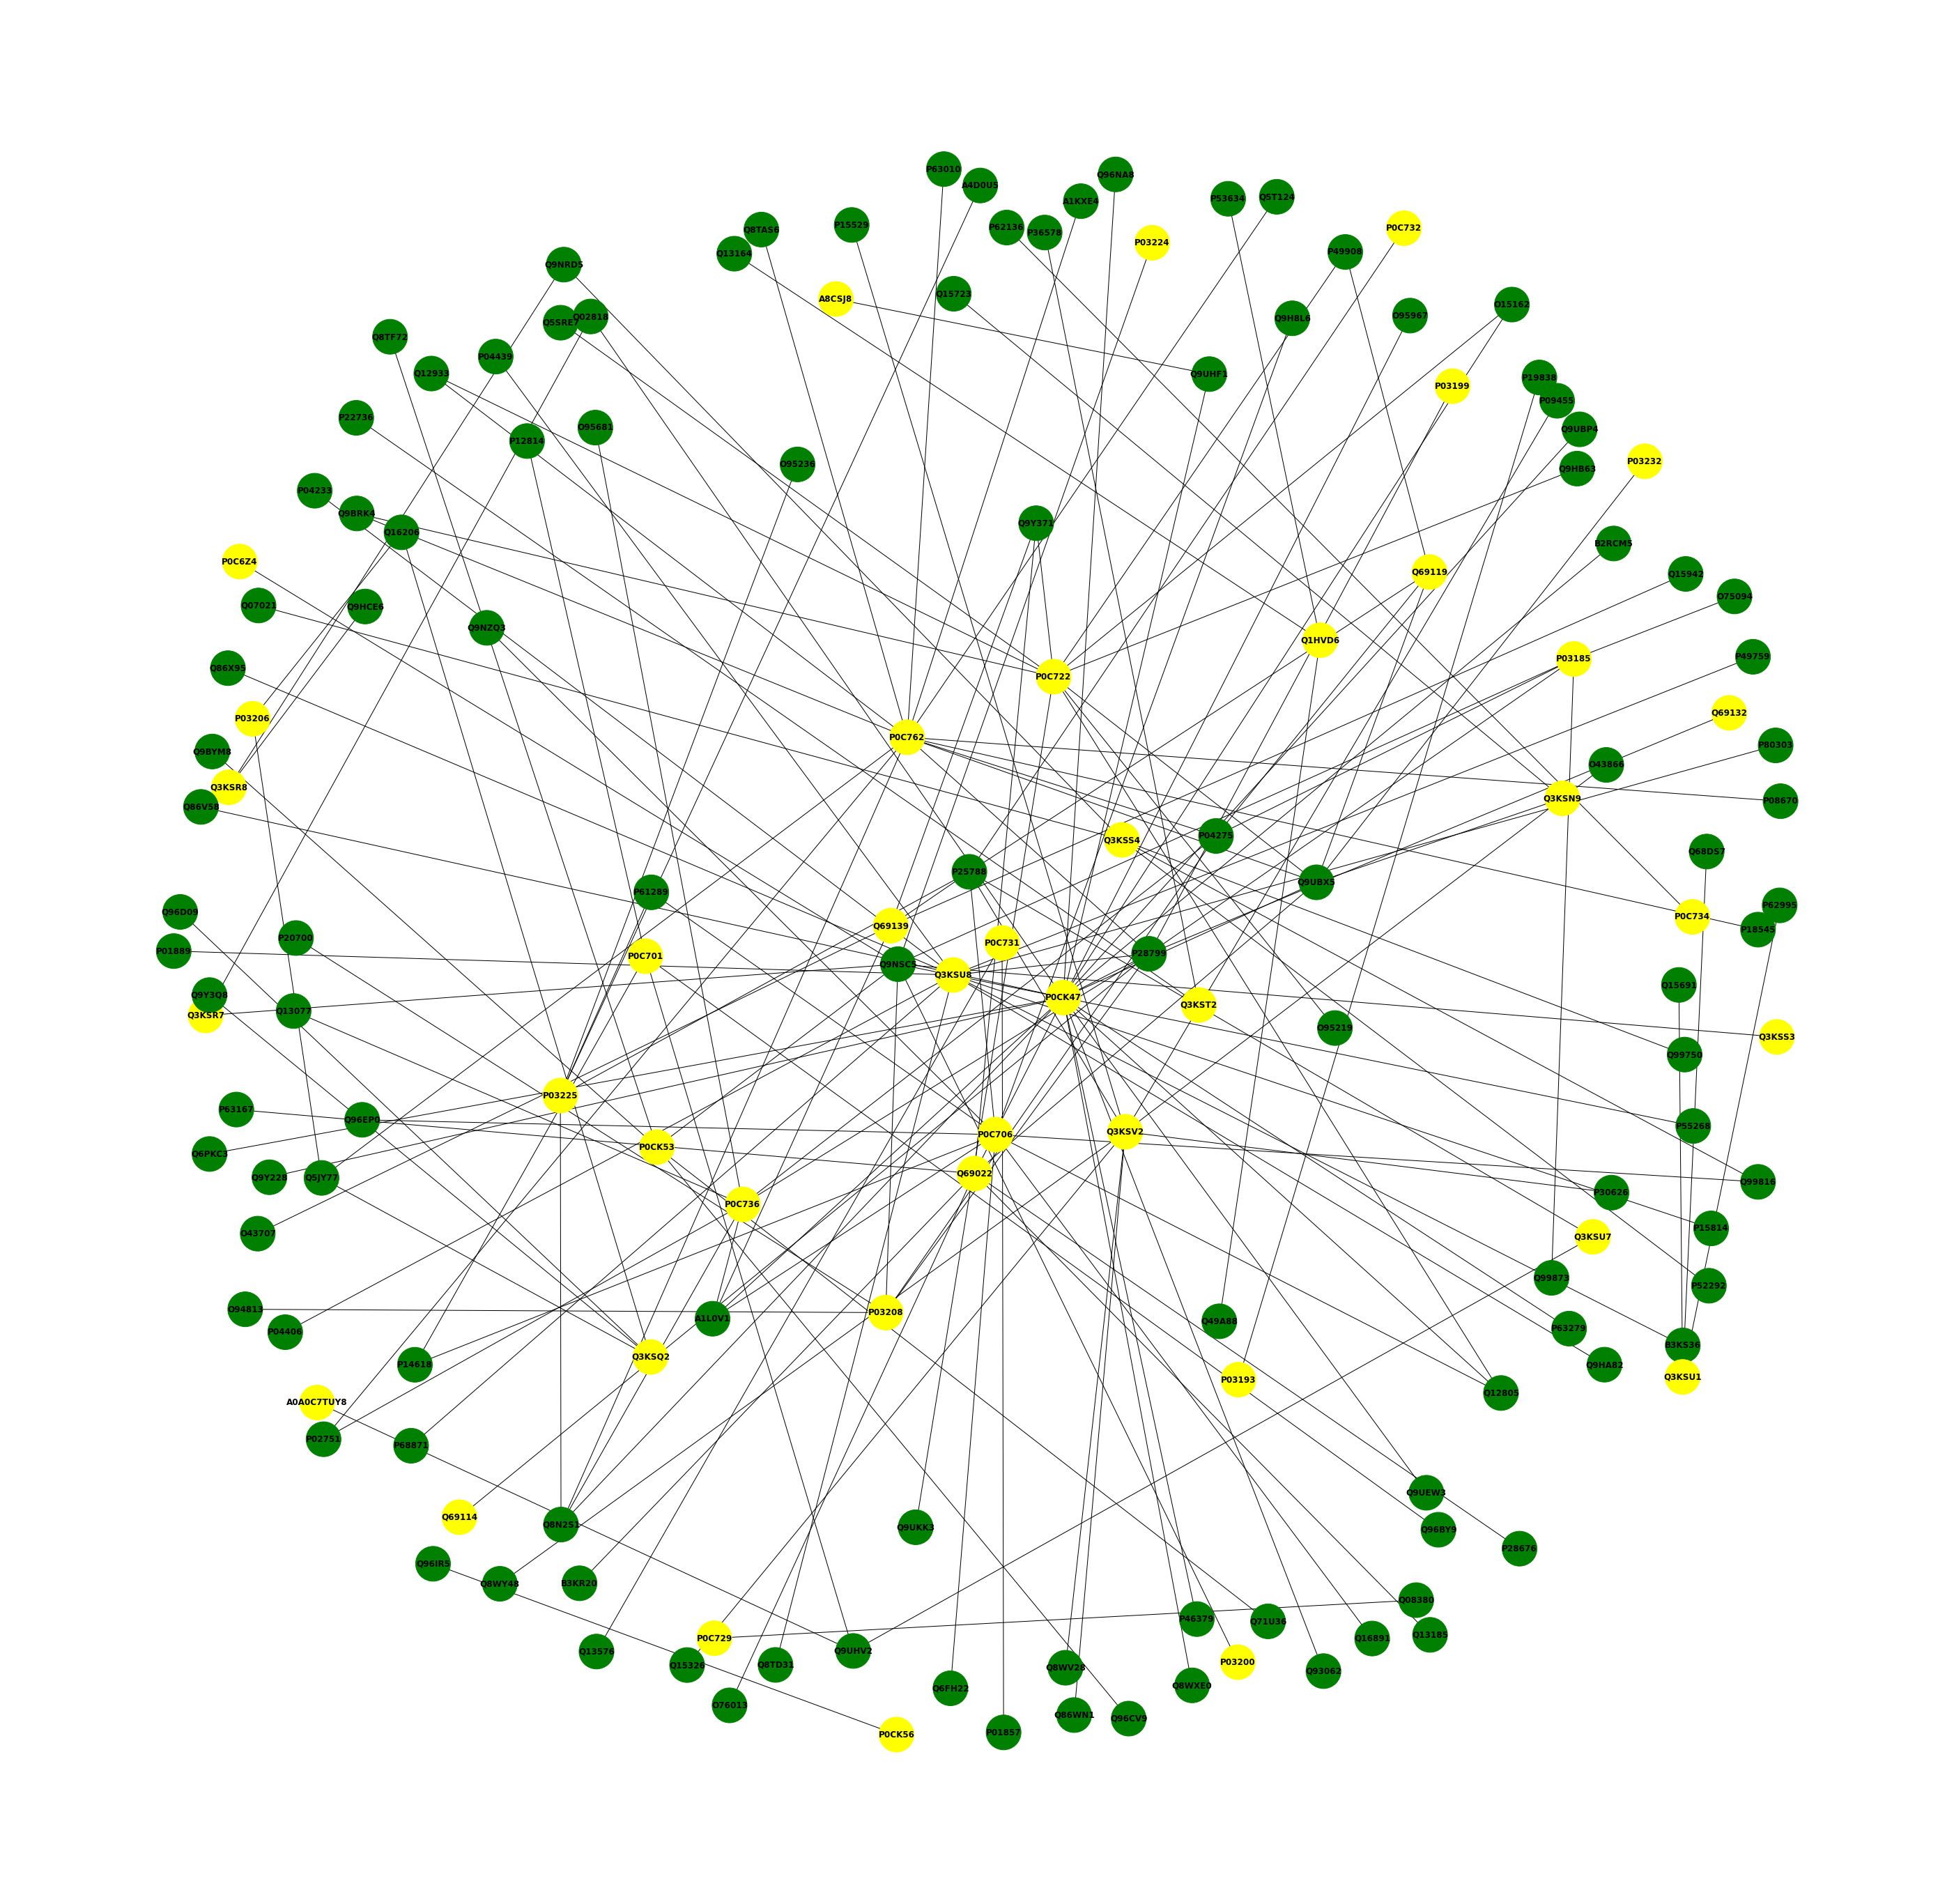

In [108]:
fig,host_ax = plt.subplots(figsize = (50,50))
host_ax.set_axis_off()
nodes_pos_dict = nx.spring_layout(Human_EBV_G,k = 0.8)
nx.draw(Human_EBV_G, pos = nodes_pos_dict,ax = host_ax, node_size= 2500,
        with_labels=True, font_weight='bold',
       node_color = color_list)